In [21]:
import tensorflow as tf
import os
import shutil
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#file = "./righttfrecord.tfrecord"
#file = "/Users/jacopo/Stuff/Microsoft/VoTT/TFRecordsFromV2/CMS_Creative_164657191_Kingfisher.tfrecord"
file = "/Users/jacopo/Stuff/Microsoft/VoTT/TFRecordsFromV1/CMS_Creative_164657191_Kingfisher.jpg.tfrecord"


for example in tf.python_io.tf_record_iterator(file):
    result = tf.train.Example.FromString(example)
    print(result)


features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\003\002\002\002\002\002\003\002\002\002\003\003\003\003\004\006\004\004\004\004\004\010\006\006\005\006\t\010\n\n\t\010\t\t\n\014\017\014\n\013\016\013\t\t\r\021\r\016\017\020\020\021\020\n\014\022\023\022\020\023\017\020\020\020\377\333\000C\001\003\003\003\004\003\004\010\004\004\010\020\013\t\013\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\020\377\300\000\021\010\002&\004t\003\001\"\000\002\021\001\003\021\001\377\304\000\035\000\000\002\003\000\003\001\001\000\000\000\000\000\000\000\000\000\005\006\003\004\007\000\002\010\001\t\377\304\000D\020\000\001\003\003\003\003\003\002\004\004\004\005\003\003\003\005\001\002\003\004\000\005\021\006!1\007\022A\023Q

In [23]:
from google.protobuf.json_format import MessageToJson

for example in tf.python_io.tf_record_iterator(file):
    jsonMessage = MessageToJson(tf.train.Example.FromString(example))
    print(jsonMessage)

{
  "features": {
    "feature": {
      "image/object/bbox/xmax": {
        "floatList": {
          "value": [
            0.5352035760879517,
            0.27975690364837646,
            0.5815028548240662,
            0.7922011613845825
          ]
        }
      },
      "image/object/difficult": {
        "int64List": {
          "value": [
            "0",
            "0",
            "0",
            "0"
          ]
        }
      },
      "image/key/sha256": {
        "bytesList": {
          "value": [
            "bXZONW1OSUlsbTN2bTNjc1BKZzB4TmYvUnJTL1ppRXpkc2dLZ3A3QnNvTT0="
          ]
        }
      },
      "image/object/truncated": {
        "int64List": {
          "value": [
            "0",
            "0",
            "0",
            "0"
          ]
        }
      },
      "image/width": {
        "int64List": {
          "value": [
            "1140"
          ]
        }
      },
      "image/format": {
        "bytesList": {
          "value": [
            "

In [24]:
class TFRecordExtractor:
    def __init__(self, tfrecord_file):
        self.tfrecord_file = os.path.abspath(tfrecord_file)

    def _extract_fn(self, tfrecord):
        features = {
            'image/filename': tf.FixedLenFeature([], tf.string),
            'image/encoded': tf.FixedLenFeature([], tf.string),
            'image/width': tf.FixedLenFeature([], tf.int64),
            'image/height': tf.FixedLenFeature([], tf.int64)
        }

        sample = tf.parse_single_example(tfrecord, features)

        filename = sample['image/filename']
        image = sample['image/encoded']        
        width = sample['image/width']
        height = sample['image/height']
        return [filename, image, width, height]        

    def extract_image(self):
        dataset = tf.data.TFRecordDataset([self.tfrecord_file])
        dataset = dataset.map(self._extract_fn)
        iterator = dataset.make_one_shot_iterator()
        next_image_data = iterator.get_next()

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            image_data = sess.run(next_image_data)
            name = image_data[0]
            image = image_data[1]
            width = image_data[2]
            height = image_data[3]
            return (name, width, height, image)

b'CMS_Creative_164657191_Kingfisher.jpg'
1140
550


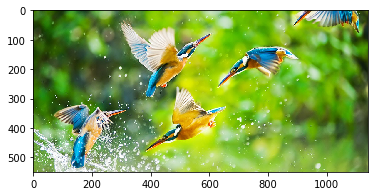

In [25]:
t = TFRecordExtractor(file)
(name, width, height, image) = t.extract_image()

print(name)
print(width)
print(height)
#print(imageFeatures.image)
image = Image.open(BytesIO(image))
plt.imshow(image)

In [6]:
from luminoth import Detector, read_image, vis_objects

In [7]:
asset = [{'bbox': [307, 30, 615, 300], 'label': 'bird', 'prob': 0.9977}, {'bbox': [376, 257, 651, 478], 'label': 'bird', 'prob': 0.9966}, {'bbox': [632, 117, 913, 264], 'label': 'bird', 'prob': 0.9817}, {'bbox': [73, 317, 321, 539], 'label': 'bird', 'prob': 0.9564}, {'bbox': [69, 310, 321, 537], 'label': 'person', 'prob': 0.884}]
asset

[{'bbox': [307, 30, 615, 300], 'label': 'bird', 'prob': 0.9977},
 {'bbox': [376, 257, 651, 478], 'label': 'bird', 'prob': 0.9966},
 {'bbox': [632, 117, 913, 264], 'label': 'bird', 'prob': 0.9817},
 {'bbox': [73, 317, 321, 539], 'label': 'bird', 'prob': 0.9564},
 {'bbox': [69, 310, 321, 537], 'label': 'person', 'prob': 0.884}]

In [ ]:
vis_objects(image, asset)